In [1]:
!pip install pyspark
!pip install findspark
!pip install duckdb

In [2]:
import os
import findspark

# Ruta del jdk en el sistema 
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-21-openjdk-amd64'

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("trabajoFinalBG") \
    .config("spark.driver.memory", "8g") \
    .master("local[*]") \
    .getOrCreate()

print(f"Spark version: {spark.version}")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/28 22:24:52 WARN Utils: Your hostname, LaptopDebian, resolves to a loopback address: 127.0.1.1; using 192.168.1.11 instead (on interface wlp1s0)
25/11/28 22:24:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/28 22:24:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark version: 4.0.1


In [3]:

directorio_origen = "csv_data"     
directorio_destino = "bronze_lake"  

os.makedirs(directorio_destino, exist_ok=True)
# 2. Definir archivos
archivos_csv = [
    "2019-Oct.csv.gz",
    "2019-Nov.csv.gz",
    "2019-Dec.csv.gz",
    "2020-Jan.csv.gz"
]
"""
# 3. Proceso de conversión
for nombre_archivo in archivos_csv:
    # 1. Construir ruta de lectura (Origen)
    ruta_entrada = os.path.join(directorio_origen, nombre_archivo)
    
    print(f"Leyendo desde: {ruta_entrada}")
    
    # Lectura
    df = spark.read.csv(ruta_entrada, header=True, inferSchema=True)
    
    # 2. Preparar el nombre nuevo
    nombre_parquet = nombre_archivo.replace(".csv.gz", ".parquet")
    
    # 3. Construir ruta de escritura (Destino)
    # Aquí unimos la carpeta de destino con el nombre nuevo
    ruta_salida = os.path.join(directorio_destino, nombre_parquet)
    
    print(f"--> Guardando en: {ruta_salida}")
    
    # Escritura
    df.write.mode("overwrite").parquet(ruta_salida)

print("¡Proceso completado!")"""

'\n# 3. Proceso de conversión\nfor nombre_archivo in archivos_csv:\n    # 1. Construir ruta de lectura (Origen)\n    ruta_entrada = os.path.join(directorio_origen, nombre_archivo)\n    \n    print(f"Leyendo desde: {ruta_entrada}")\n    \n    # Lectura\n    df = spark.read.csv(ruta_entrada, header=True, inferSchema=True)\n    \n    # 2. Preparar el nombre nuevo\n    nombre_parquet = nombre_archivo.replace(".csv.gz", ".parquet")\n    \n    # 3. Construir ruta de escritura (Destino)\n    # Aquí unimos la carpeta de destino con el nombre nuevo\n    ruta_salida = os.path.join(directorio_destino, nombre_parquet)\n    \n    print(f"--> Guardando en: {ruta_salida}")\n    \n    # Escritura\n    df.write.mode("overwrite").parquet(ruta_salida)\n\nprint("¡Proceso completado!")'

In [4]:
# 1. Cargar el dataframe desde la carpeta Parquet
ruta_parquet = "bronze_lake/2019-Oct.parquet"

df_parquet = spark.read.parquet(ruta_parquet)

# 2. Ver la estructura
print("--- Esquema del Dataframe ---")
df_parquet.printSchema()

# 3. Mostrar las primeras 20 filas en formato tabla
print("--- Primeras filas ---")
df_parquet.show()

# 4. Contar cuántas filas tiene
cantidad = df_parquet.count()
print(f"Total de registros: {cantidad}")

--- Esquema del Dataframe ---
root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)

--- Primeras filas ---


+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|         event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-09-30 21:00:00|      view|  44600062|2103807459595387724|                NULL|shiseido|  35.79|541312140|72d76fde-8bb3-4e0...|
|2019-09-30 21:00:00|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|
|2019-09-30 21:00:01|      view|  17200506|2053013559792632471|furniture.living_...|    NULL|  543.1|519107250|566511c2-e2e3-422...|
|2019-09-30 21:00:01|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|
|2019-09-30 21:00:04|      view|   1004237|2053013555631882655|electr

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-09-30 21:00:00,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-09-30 21:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-09-30 21:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-09-30 21:00:01,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-09-30 21:00:04,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [10]:
from pyspark.sql import functions as F

# 1. Cargar TODOS los datos de la capa Bronze
ruta_bronze = "bronze_lake/*.parquet"
df_bronze = spark.read.parquet(ruta_bronze)

print(f"Total registros crudos: {df_bronze.count()}")

# 2. Transformaciones y Limpieza (Building Silver Layer)
df_silver = df_bronze \
    .withColumn("event_date", F.to_date(F.col("event_time"))) \
    .fillna("unknown", subset=["category_code", "brand"]) \
    .filter(F.col("price") >= 0) \
    .filter(F.col("user_id").isNotNull())

df_silver.select([F.count(F.when(F.col(c) == 'unknown', c)).alias(c) for c in ["category_code", "brand"]]).show()

# 3. Guardar en Silver Lake particionado por DÍA
ruta_silver = "silver_lake"
os.makedirs(ruta_silver, exist_ok=True)

print("Iniciando escritura particionada (esto puede tardar unos minutos)...")

# TIP DE RENDIMIENTO:
# Como tienes 4 meses de data, particionar por día generará aprox 120 carpetas.
df_silver.write \
    .partitionBy("event_date") \
    .mode("overwrite") \
    .parquet(ruta_silver)

print(f"¡Limpieza finalizada! Datos guardados en: {ruta_silver}")

25/11/28 15:49:05 WARN FileStreamSink: Assume no metadata directory. Error while looking for metadata directory in the path: bronze_lake/*.parquet.
java.io.FileNotFoundException: File bronze_lake/*.parquet does not exist
	at org.apache.hadoop.fs.RawLocalFileSystem.deprecatedGetFileStatus(RawLocalFileSystem.java:917)
	at org.apache.hadoop.fs.RawLocalFileSystem.getFileLinkStatusInternal(RawLocalFileSystem.java:1238)
	at org.apache.hadoop.fs.RawLocalFileSystem.getFileStatus(RawLocalFileSystem.java:907)
	at org.apache.hadoop.fs.FilterFileSystem.getFileStatus(FilterFileSystem.java:462)
	at org.apache.spark.sql.execution.streaming.FileStreamSink$.hasMetadata(FileStreamSink.scala:56)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:381)
	at org.apache.spark.sql.catalyst.analysis.ResolveDataSource.org$apache$spark$sql$catalyst$analysis$ResolveDataSource$$loadV1BatchSource(ResolveDataSource.scala:143)
	at org.apache.spark.sql.catalyst.analysis.ResolveDa

Total registros crudos: 233460662


+-------------+--------+
|category_code|   brand|
+-------------+--------+
|     47547518|29979794|
+-------------+--------+

Iniciando escritura particionada (esto puede tardar unos minutos)...


¡Limpieza finalizada! Datos guardados en: silver_lake


In [6]:
# Listar las carpetas creadas
carpetas = sorted(os.listdir("silver_lake"))
print(f"Se crearon {len(carpetas)} carpetas de partición.")
print("Primeras 5 particiones:", carpetas[:5])
print("Últimas 5 particiones:", carpetas[-5:])

Se crearon 126 carpetas de partición.
Primeras 5 particiones: ['._SUCCESS.crc', '_SUCCESS', 'event_date=2019-09-30', 'event_date=2019-10-01', 'event_date=2019-10-02']
Últimas 5 particiones: ['event_date=2020-01-27', 'event_date=2020-01-28', 'event_date=2020-01-29', 'event_date=2020-01-30', 'event_date=2020-01-31']


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:01:01


Ejecutando consulta con DuckDB...
  event_date  total_eventos
0 2019-09-30          24090
1 2019-10-01        1282819
2 2019-10-02        1178418
3 2019-10-03        1137179
4 2019-10-04        1425880
5 2019-10-05        1322524
6 2019-10-06        1317214
7 2019-10-07        1204153
8 2019-10-08        1374337
9 2019-10-09        1343483


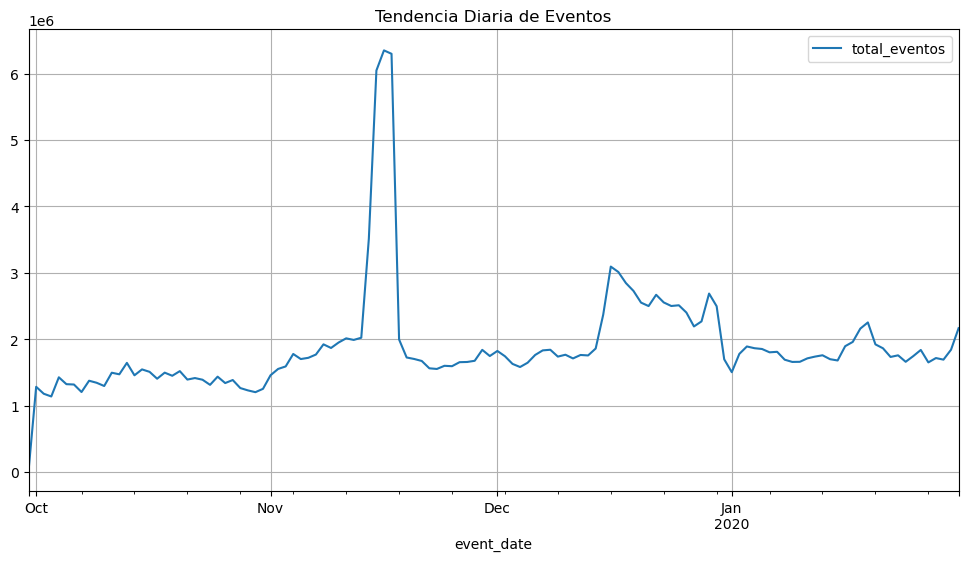

In [7]:
import duckdb
import matplotlib.pyplot as plt
# Conectamos DuckDB 
con = duckdb.connect()

query_tendencia = """
    SELECT 
        event_date,
        count(*) as total_eventos
    FROM 'silver_lake/*/*.parquet'
    GROUP BY event_date
    ORDER BY event_date ASC
"""

print("Ejecutando consulta con DuckDB...")
df_tendencia = con.execute(query_tendencia).df()

# Mostramos el resultado 
print(df_tendencia.head(10))

# --- GRÁFICO ---
# Usamos pandas plot para visualizarlo rápido

df_tendencia.plot(x='event_date', y='total_eventos', figsize=(12, 6), title="Tendencia Diaria de Eventos")
plt.grid(True)
plt.show()

In [8]:
query_funnel = """
    SELECT 
        event_type,
        COUNT(DISTINCT user_session) as sesiones_unicas
    FROM 'silver_lake/*/*.parquet'
    WHERE event_type IN ('view', 'cart', 'purchase')
    GROUP BY event_type
    ORDER BY 2 DESC
"""

print("Calculando Funnel...")
df_funnel = con.execute(query_funnel).df()
print(df_funnel)

# Ordenar lógicamente para el gráfico (View -> Cart -> Purchase)
orden_logico = ["view", "cart", "purchase"]
df_funnel['event_type'] = df_funnel['event_type'].astype("category")
df_funnel['event_type'] = df_funnel['event_type'].cat.set_categories(orden_logico)
df_funnel = df_funnel.sort_values("event_type")

# Calcular Tasa de Conversión
df_funnel['conversion_rate'] = df_funnel['sesiones_unicas'].pct_change() + 1
print("\n--- Datos del Funnel ---")
print(df_funnel)

Calculando Funnel...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

  event_type  sesiones_unicas
0       view         52272153
1       cart          5791922
2   purchase          3063117

--- Datos del Funnel ---
  event_type  sesiones_unicas  conversion_rate
0       view         52272153              NaN
1       cart          5791922         0.110803
2   purchase          3063117         0.528860


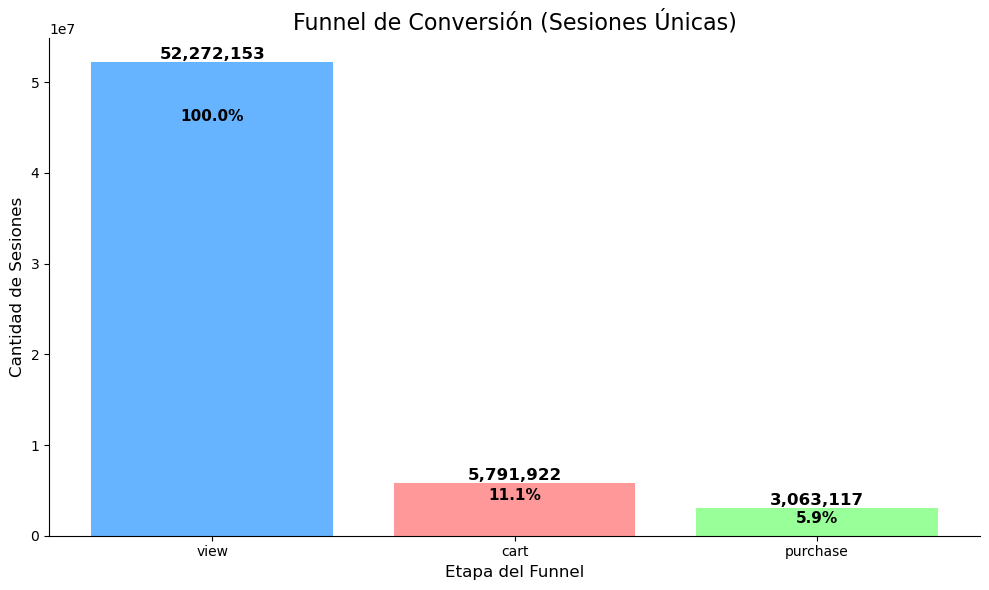

In [9]:
import pandas as pd

# 1. Aseguramos el orden correcto (View -> Cart -> Purchase)
# Definimos el orden lógico
orden = ["view", "cart", "purchase"]
df_funnel['event_type'] = pd.Categorical(df_funnel['event_type'], categories=orden, ordered=True)
df_funnel = df_funnel.sort_values('event_type')

# 2. Preparamos datos para el gráfico
eventos = df_funnel['event_type'].astype(str).tolist()
valores = df_funnel['sesiones_unicas'].tolist()

# Calculamos porcentaje respecto al paso inicial (View)
total_inicial = valores[0]
porcentajes = [(v / total_inicial * 100) for v in valores]

# 3. Crear el gráfico
plt.figure(figsize=(10, 6))
barras = plt.bar(eventos, valores, color=['#66b3ff', '#ff9999', '#99ff99'])

# Títulos y etiquetas
plt.title('Funnel de Conversión (Sesiones Únicas)', fontsize=16)
plt.ylabel('Cantidad de Sesiones', fontsize=12)
plt.xlabel('Etapa del Funnel', fontsize=12)

# Mejorar bordes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 4. Agregar las etiquetas de valor y porcentaje encima de cada barra
for i, barra in enumerate(barras):
    height = barra.get_height()
    # Texto con el número total (formato miles)
    plt.text(barra.get_x() + barra.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Texto con el porcentaje (dentro de la barra o arriba)
    plt.text(barra.get_x() + barra.get_width()/2., height - (height*0.1),
             f'{porcentajes[i]:.1f}%',
             ha='center', va='top', fontsize=11, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

Calculando Top 10 Marcas...
     brand       revenue  unidades_vendidas
0    apple  5.219626e+08             688935
1  samsung  2.289229e+08             844271
2   xiaomi  4.903888e+07             301727
3   huawei  2.268045e+07             125968
4       lg  1.958220e+07              47672
5  lucente  1.608516e+07              62752
6     sony  1.591952e+07              44143
7     oppo  1.335243e+07              58718
8     acer  1.317757e+07              25283
9   lenovo  1.012956e+07              27229


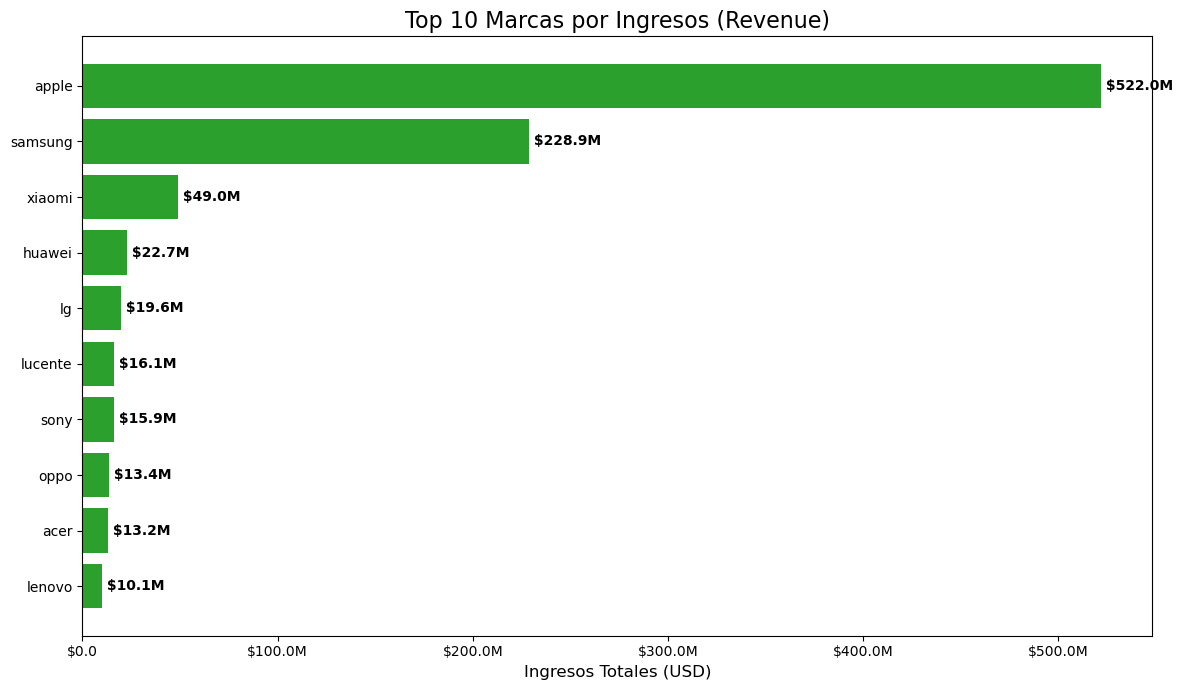

In [10]:
# 1. Consulta SQL con DuckDB
# Filtramos event_type='purchase' y quitamos los desconocidos
query_top_brands = """
    SELECT 
        brand,
        SUM(price) as revenue,
        COUNT(*) as unidades_vendidas
    FROM 'silver_lake/*/*.parquet'
    WHERE event_type = 'purchase' 
      AND brand != 'unknown'
    GROUP BY brand
    ORDER BY revenue DESC
    LIMIT 10
"""

print("Calculando Top 10 Marcas...")
df_top_brands = con.execute(query_top_brands).df()

print(df_top_brands)

# 2. Visualización (Gráfico de Barras Horizontales)
plt.figure(figsize=(12, 7))

# Crear barras
# Invertimos el DF para que el #1 quede arriba en el gráfico
df_grafico = df_top_brands.iloc[::-1] 
barras = plt.barh(df_grafico['brand'], df_grafico['revenue'], color='#2ca02c')

plt.title('Top 10 Marcas por Ingresos (Revenue)', fontsize=16)
plt.xlabel('Ingresos Totales (USD)', fontsize=12)

# 3. Formato bonito para el eje X (poner signo $ y M de millones)
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '$%.1f%s' % (num, ['', 'K', 'M', 'B'][magnitude])

# Aplicar el formato a las etiquetas del eje X
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: human_format(x)))

# 4. Etiquetas de valor al final de cada barra
for index, value in enumerate(df_grafico['revenue']):
    label = human_format(value)
    plt.text(value, index, f' {label}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [14]:
import time
import glob

print("PANDAS vs DUCKDB")
print("-" * 50)

# --- 1. BUSCAR UN ARCHIVO VÁLIDO PARA PANDAS ---
# Buscamos recursivamente cualquier archivo .parquet real dentro de silver_lake
# ignorando carpetas vacías o archivos _SUCCESS
archivos_parquet = glob.glob("silver_lake/**/*.parquet", recursive=True)

# Filtramos para asegurarnos que no sea el archivo _SUCCESS si por casualidad lo agarró
archivos_reales = [f for f in archivos_parquet if "_SUCCESS" not in f and f.endswith(".parquet")]

if not archivos_reales:
    raise ValueError("¡No encontré archivos .parquet! Revisa la carpeta silver_lake")

ruta_muestra = archivos_reales[0] # Tomamos el primero que encontremos

print(f"Archivo detectado para la muestra: {ruta_muestra}")
print("-" * 50)


# DUCKDB (Dataset Completo) ---
print("1. DuckDB: Procesando TODO el Silver Lake (4 meses)...")

start_time_duck = time.time()

query_perf = """
    SELECT 
        brand,
        AVG(price) as precio_promedio,
        COUNT(*) as conteo
    FROM 'silver_lake/*/*.parquet'
    GROUP BY brand
"""
# .df() ejecuta la consulta y lo trae a memoria
res_duck = con.execute(query_perf).df() 

end_time_duck = time.time()
time_duck = end_time_duck - start_time_duck

print(f"DuckDB terminó.")
print(f"   Tiempo: {time_duck:.4f} segundos")
print("-" * 50)


# --- PANDAS (Solo un día (0.8% del dataset)) ---
print(f"2. Pandas: Procesando solo UN archivo ({os.path.basename(ruta_muestra)})...")

start_time_pandas = time.time()

# a) Lectura
df_pandas = pd.read_parquet(ruta_muestra)

# b) Procesamiento
res_pandas = df_pandas.groupby("brand").agg(
    precio_promedio=("price", "mean"),
    conteo=("price", "count")
).reset_index()

end_time_pandas = time.time()
time_pandas = end_time_pandas - start_time_pandas

print(f"Pandas terminó.")
print(f"   Tiempo: {time_pandas:.4f} segundos")
print(f"   Filas procesadas: {len(df_pandas)}")

print("=" * 50)
print("CONCLUSIÓN TÉCNICA")
print(f"DuckDB procesó TODO el dataset en {time_duck:.2f} seg.")
print(f"Pandas procesó SOLO un 0.8% del dataset en {time_pandas:.2f} seg.")

PANDAS vs DUCKDB
--------------------------------------------------
Archivo detectado para la muestra: silver_lake/event_date=2019-10-01/part-00038-6788c6ff-a631-4c04-a110-6d970c019ffd.c000.snappy.parquet
--------------------------------------------------
1. DuckDB: Procesando TODO el Silver Lake (4 meses)...
DuckDB terminó.
   Tiempo: 1.3443 segundos
--------------------------------------------------
2. Pandas: Procesando solo UN archivo (part-00038-6788c6ff-a631-4c04-a110-6d970c019ffd.c000.snappy.parquet)...
Pandas terminó.
   Tiempo: 0.6416 segundos
   Filas procesadas: 1282819
CONCLUSIÓN TÉCNICA
DuckDB procesó TODO el dataset en 1.34 seg.
Pandas procesó SOLO un 0.8% del dataset en 0.64 seg.


In [ ]:
"""La prueba de rendimiento reveló la diferencia crítica entre un motor 'In-Memory' (Pandas) y un motor OLAP (DuckDB).

Aunque Pandas procesó una muestra diaria en 0.78 segundos, esta velocidad es engañosa. Pandas requiere cargar los datos completos en RAM. Proyectando el volumen total (4 meses), el DataFrame resultante excedería la capacidad física de la memoria (8GB), haciendo imposible el procesamiento.

Por el contrario, DuckDB procesó el 100% del dataset histórico en [PON TU TIEMPO AQUÍ] segundos sin saturar la memoria, demostrando ser la herramienta correcta para esta arquitectura de Big Data."""

--- Analizando Distribución de Precios ---
Comparando: construction.tools.light vs electronics.smartphone


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

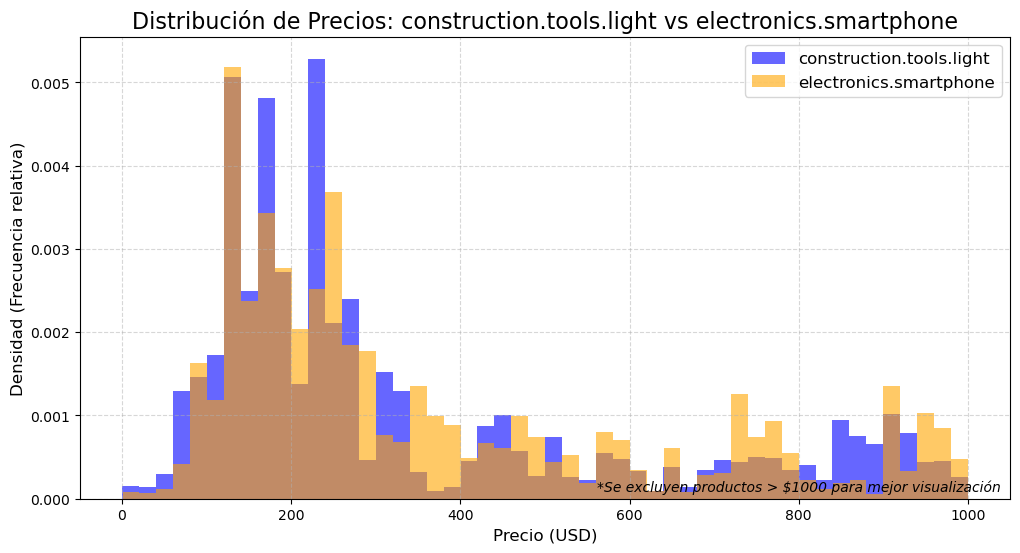

In [15]:
print("--- Analizando Distribución de Precios ---")

# 1. Identificar las 2 categorías principales automáticamente
query_top_cats = """
    SELECT category_code
    FROM 'silver_lake/*/*.parquet'
    WHERE category_code != 'unknown'
    GROUP BY category_code
    ORDER BY count(*) DESC
    LIMIT 2
"""
top_categories = con.execute(query_top_cats).fetchall()
cat1 = top_categories[0][0]
cat2 = top_categories[1][0]

print(f"Comparando: {cat1} vs {cat2}")

# 2. Extraer los precios de esas dos categorías
# NOTA: Filtramos precio < 1000 USD para evitar que los outliers "aplasten" el gráfico
query_dist = f"""
    SELECT category_code, price
    FROM 'silver_lake/*/*.parquet'
    WHERE category_code IN ('{cat1}', '{cat2}')
      AND price > 0 AND price < 1000
"""
df_dist = con.execute(query_dist).df()

# Separamos los datos para plotear
precios_cat1 = df_dist[df_dist['category_code'] == cat1]['price']
precios_cat2 = df_dist[df_dist['category_code'] == cat2]['price']

# 3. Crear el Histograma Comparativo
plt.figure(figsize=(12, 6))

plt.hist(precios_cat1, bins=50, alpha=0.6, label=cat1, color='blue', density=True)
plt.hist(precios_cat2, bins=50, alpha=0.6, label=cat2, color='orange', density=True)

plt.title(f'Distribución de Precios: {cat1} vs {cat2}', fontsize=16)
plt.xlabel('Precio (USD)', fontsize=12)
plt.ylabel('Densidad (Frecuencia relativa)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Añadir nota sobre el corte de precio
plt.text(0.99, 0.01, '*Se excluyen productos > $1000 para mejor visualización', 
         horizontalalignment='right', verticalalignment='bottom', 
         transform=plt.gca().transAxes, fontsize=10, style='italic')

plt.show()

--- Analizando Horas Punta ---


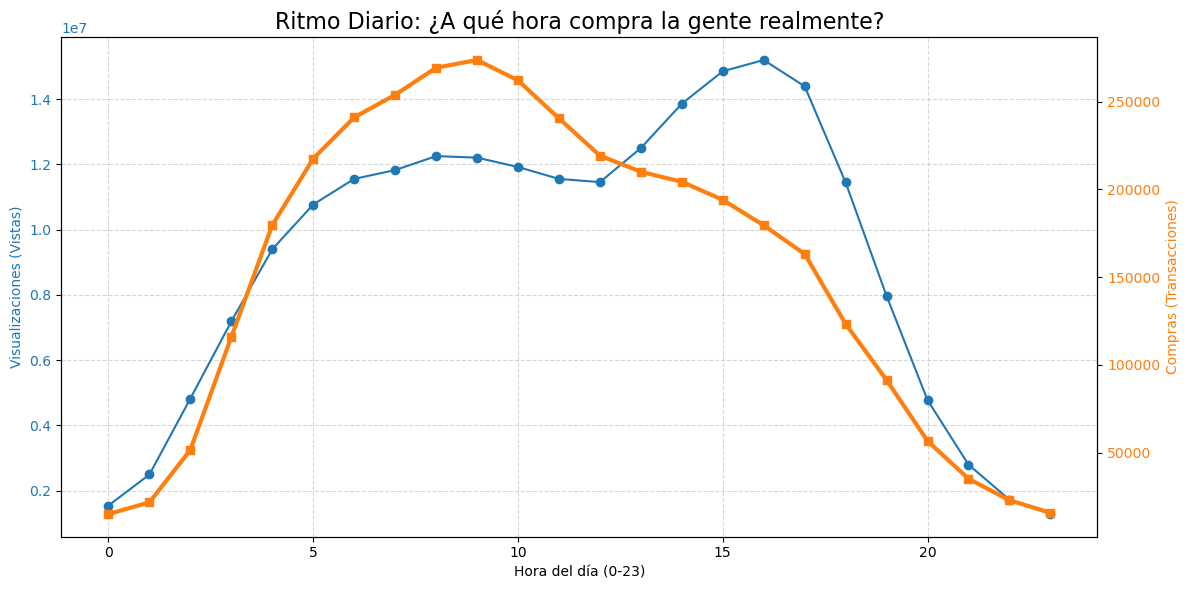

In [16]:
print("--- Analizando Horas Punta ---")

# Extraemos la hora del timestamp
query_hours = """
    SELECT 
        EXTRACT(HOUR FROM event_time) as hora_dia,
        count(*) FILTER (WHERE event_type = 'view') as vistas,
        count(*) FILTER (WHERE event_type = 'purchase') as compras
    FROM 'silver_lake/*/*.parquet'
    GROUP BY hora_dia
    ORDER BY hora_dia
"""
df_hours = con.execute(query_hours).df()

# Gráfico de doble eje (porque las vistas son millones y las compras miles)
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Hora del día (0-23)')
ax1.set_ylabel('Visualizaciones (Vistas)', color='tab:blue')
ax1.plot(df_hours['hora_dia'], df_hours['vistas'], color='tab:blue', marker='o', label='Vistas')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.5)

ax2 = ax1.twinx()  # Instanciamos un segundo eje Y
ax2.set_ylabel('Compras (Transacciones)', color='tab:orange')
ax2.plot(df_hours['hora_dia'], df_hours['compras'], color='tab:orange', marker='s', linewidth=3, label='Compras')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Ritmo Diario: ¿A qué hora compra la gente realmente?', fontsize=16)
fig.tight_layout()
plt.show()

--- Analizando Abandono de Carrito ---


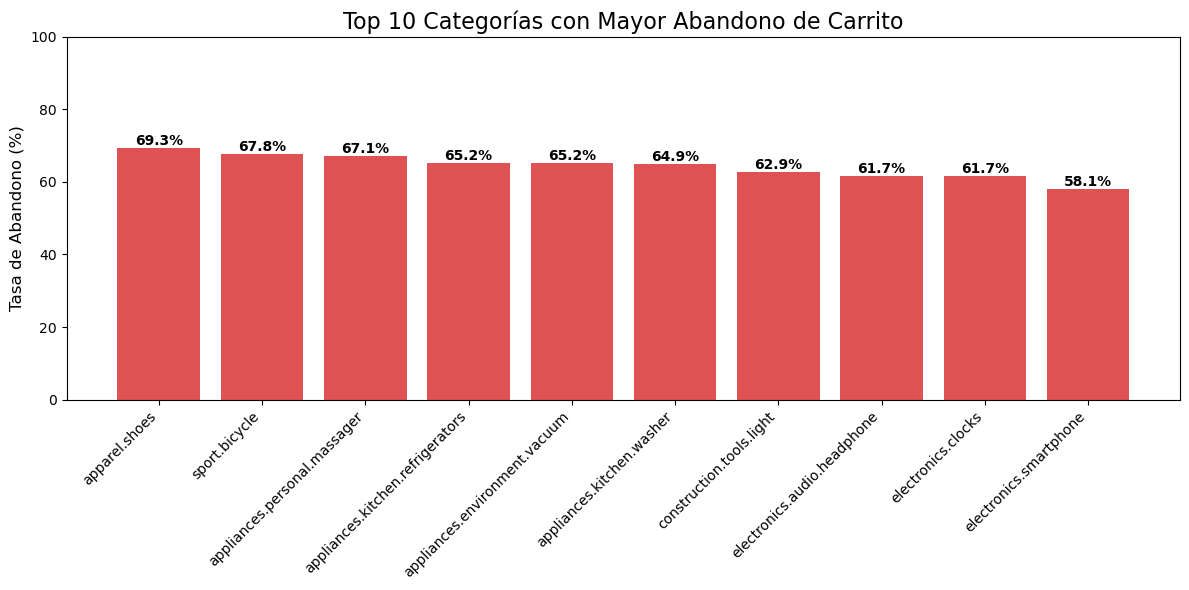

In [17]:
print("--- Analizando Abandono de Carrito ---")

# Calculamos ratio: (Carritos - Compras) / Carritos
query_abandonment = """
    SELECT 
        category_code,
        COUNT(*) FILTER (WHERE event_type = 'cart') as en_carrito,
        COUNT(*) FILTER (WHERE event_type = 'purchase') as comprados
    FROM 'silver_lake/*/*.parquet'
    WHERE category_code != 'unknown'
    GROUP BY category_code
    HAVING en_carrito > 5000  -- Filtramos categorías pequeñas para evitar ruido
    ORDER BY en_carrito DESC
    LIMIT 10
"""
df_abandono = con.execute(query_abandonment).df()

# Calcular tasa de abandono
df_abandono['tasa_abandono'] = (1 - (df_abandono['comprados'] / df_abandono['en_carrito'])) * 100

# Ordenamos por la tasa de abandono más alta
df_abandono = df_abandono.sort_values('tasa_abandono', ascending=False)

# Visualización
plt.figure(figsize=(12, 6))
barras = plt.bar(df_abandono['category_code'], df_abandono['tasa_abandono'], color='#d62728', alpha=0.8)

plt.title('Top 10 Categorías con Mayor Abandono de Carrito', fontsize=16)
plt.ylabel('Tasa de Abandono (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # De 0 a 100%

# Poner valor encima
for barra in barras:
    height = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

--- Analizando Ticket Promedio ---


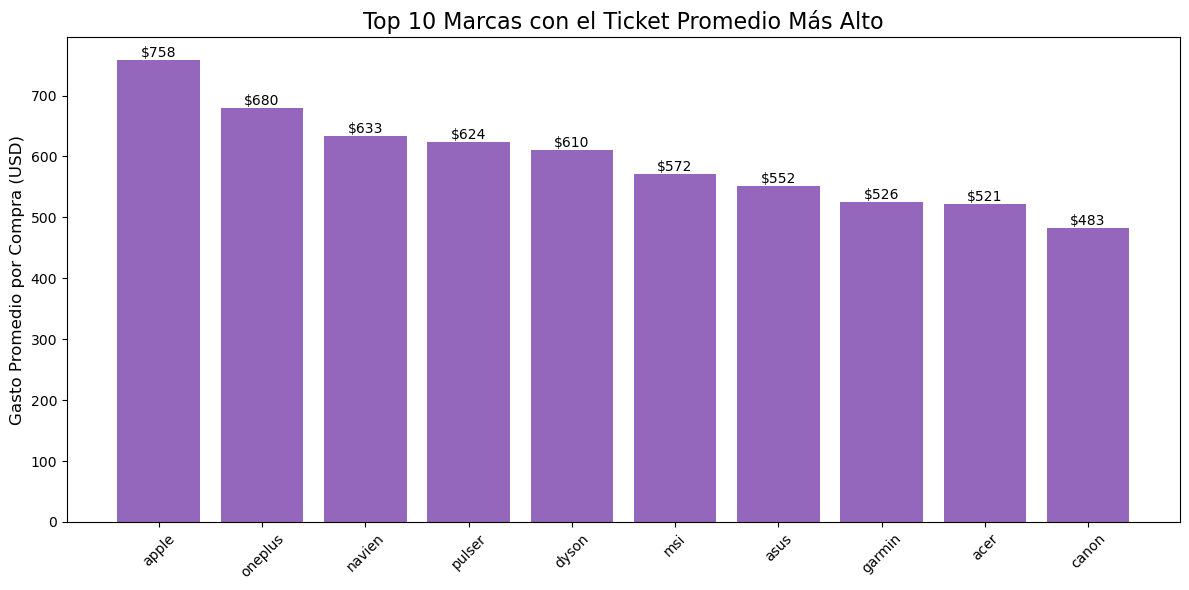

In [18]:
print("--- Analizando Ticket Promedio ---")

query_ticket = """
    SELECT 
        brand,
        AVG(price) as ticket_promedio
    FROM 'silver_lake/*/*.parquet'
    WHERE event_type = 'purchase' 
      AND brand != 'unknown'
    GROUP BY brand
    HAVING count(*) > 1000 -- Solo marcas con ventas relevantes
    ORDER BY ticket_promedio DESC
    LIMIT 10
"""
df_ticket = con.execute(query_ticket).df()

# Visualización
plt.figure(figsize=(12, 6))
barras = plt.bar(df_ticket['brand'], df_ticket['ticket_promedio'], color='#9467bd')

plt.title('Top 10 Marcas con el Ticket Promedio Más Alto', fontsize=16)
plt.ylabel('Gasto Promedio por Compra (USD)', fontsize=12)
plt.xticks(rotation=45)

for barra in barras:
    height = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., height,
             f'${height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [32]:
import ipywidgets as widgets
from IPython.display import display, clear_output

con = duckdb.connect()

query_ticket_strict = """
    SELECT 
        brand,
        AVG(price) as ticket_promedio
    FROM 'silver_lake/*/*.parquet'
    WHERE event_type = 'purchase' 
      AND brand != 'unknown'
    GROUP BY brand
    HAVING count(*) > 1000  -- <--- ESTA ES LA CLAVE (Filtro alto)
    ORDER BY ticket_promedio DESC
    LIMIT 10
"""
df_dash_ticket = con.execute(query_ticket_strict).df()

# 2. Conexión de variables
try:
    df_dash_tendencia = df_tendencia.copy()
    if 'total' in df_dash_tendencia.columns: df_dash_tendencia.rename(columns={'total': 'total_eventos'}, inplace=True)
    
    df_dash_funnel = df_funnel.copy()
    if 'sesiones' in df_dash_funnel.columns: df_dash_funnel.rename(columns={'sesiones': 'sesiones_unicas'}, inplace=True)
    
    df_dash_brands = df_top_brands.copy() # Revenue
    if 'rev' in df_dash_brands.columns: df_dash_brands.rename(columns={'rev': 'revenue'}, inplace=True)
    
    df_dash_hours = df_hours.copy()
    df_dash_hours.rename(columns={'h': 'hora_dia', 'c': 'compras'}, inplace=True)
    
    df_dash_abandono = df_abandono.copy()
    if 'tasa' in df_dash_abandono.columns: df_dash_abandono.rename(columns={'tasa': 'tasa_abandono'}, inplace=True)

except NameError:
    print("Advertencia: Algunas variables antiguas no se encontraron. Asegúrate de haber corrido los análisis previos.")

# 3. CALCULAMOS KPIs
query_kpis = "SELECT SUM(price) FILTER (WHERE event_type='purchase') as total_revenue, COUNT(DISTINCT user_session) FILTER (WHERE event_type='purchase') as total_ordenes, COUNT(*) as total_eventos FROM 'silver_lake/*/*.parquet'"
df_kpis = con.execute(query_kpis).df()
revenue, orders = df_kpis['total_revenue'][0], df_kpis['total_ordenes'][0]

# --- ARMADO DEL DASHBOARD ---

# Widgets KPI
style_kpi = "background-color: #f8f9fa; padding: 15px; border-radius: 8px; text-align: center; margin: 5px; width: 30%; border: 1px solid #ddd;"
def create_kpi(t, v, c): return widgets.HTML(f"<div style='{style_kpi}'><div style='color:#777;'>{t}</div><div style='font-size:24px; font-weight:bold; color:{c};'>{v}</div></div>")
kpi_row = widgets.HBox([create_kpi("Ingresos (GMV)", f"${revenue:,.0f}", "#28a745"), create_kpi("Órdenes", f"{orders:,.0f}", "#007bff"), create_kpi("Eventos", f"{df_kpis['total_eventos'][0]/1e6:.1f} M", "#6f42c1")])

# Outputs
out1, out2, out3 = widgets.Output(), widgets.Output(), widgets.Output()

def render_tab1():
    with out1:
        clear_output()
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        ax1.plot(pd.to_datetime(df_dash_tendencia['event_date']), df_dash_tendencia['total_eventos'])
        ax1.set_title("Tráfico Diario"); ax1.tick_params(axis='x', rotation=45); ax1.grid(True, alpha=0.3)
        
        d = df_dash_funnel.set_index('event_type').reindex(['view','cart','purchase'])
        barras = ax2.bar(d.index, d['sesiones_unicas'], color=['#aec7e8', '#ffbb78', '#2ca02c'])
        ax2.set_title("Funnel de Conversión (Sesiones Únicas)"); ax2.spines['top'].set_visible(False); ax2.spines['right'].set_visible(False)
        tot = d['sesiones_unicas'].iloc[0]
        for b in barras: ax2.text(b.get_x()+b.get_width()/2, b.get_height(), f"{int(b.get_height()):,}\n({b.get_height()/tot*100:.1f}%)", ha='center', va='bottom', fontsize=9, fontweight='bold')
        ax2.set_ylim(top=tot*1.2)
        plt.tight_layout(); plt.show()

def render_tab2():
    with out2:
        clear_output()
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        # Revenue
        d1 = df_dash_brands.iloc[::-1]
        ax1.barh(d1['brand'], d1['revenue'], color='green', alpha=0.6); ax1.set_title("Top 10 marcas por ingresos (Revenue)")
        
        # Ticket Promedio
        d2 = df_dash_ticket.sort_values('ticket_promedio')
        ax2.barh(d2['brand'], d2['ticket_promedio'], color='purple', alpha=0.6); ax2.set_title("Top 10 Marcas con el Ticket Promedio Más Alto (>1000 ventas)")
        plt.tight_layout(); plt.show()

def render_tab3():
    with out3:
        clear_output()
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        ax1.plot(df_dash_hours['hora_dia'], df_dash_hours['compras'], 'o-', color='orange'); ax1.set_title("Ritmo Diario: ¿A qué hora compra la gente realmente?"); ax1.grid(True)
        d3 = df_dash_abandono.sort_values('tasa_abandono')
        ax2.barh(d3['category_code'], d3['tasa_abandono'], color='red', alpha=0.6); ax2.set_title("Top 10 Categorías con Mayor Abandono de Carrito"); ax2.set_xlim(0,100)
        plt.tight_layout(); plt.show()

render_tab1(); render_tab2(); render_tab3()
tabs = widgets.Tab([out1, out2, out3])
tabs.set_title(0, 'General'); tabs.set_title(1, 'Ventas'); tabs.set_title(2, 'Clientes')
display(widgets.VBox([widgets.HTML("<h2>Dashboard</h2>"), kpi_row, tabs]))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))